In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
path_to_csv = '/content/gdrive/My Drive/diabetes.csv'

Mounted at /content/gdrive


#In class programming:


In [ ]:
#@title Existing code Without adding any additional Dense layers to the network 
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# load dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

dataset = pd.read_csv(path_to_csv, header=None).values
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8],
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # hidden layer
my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,
                                     initial_epoch=0)
print(my_first_nn.summary())
print("********************************************") #just to identify the result printing this line 
print(my_first_nn.evaluate(X_test, Y_test))

Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 15.7198 - acc: 0.6285
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 11.4972 - acc: 0.5521
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 8.3694 - acc: 0.5556
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 5.0252 - acc: 0.5451
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 2.2009 - acc: 0.4931
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 1.4678 - acc: 0.5677
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 1.2284 - acc: 0.5660
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 1.0929 - acc: 0.5972
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 1.0006 - acc: 0.5833
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 0.9336 - acc: 0.6285
Epoch 11/100
18/18 [==============================] - 0s 

In [ ]:
#@title Adding More Dense Layers to the Existing Code and Check the accuracy

nn = Sequential() # create model
nn.add(Dense(20, input_dim=8, activation='relu')) # hidden layer 1

#adding more layes
nn.add(Dense(10, input_dim=8, activation='relu')) # hidden layer 2
nn.add(Dense(5, input_dim=8, activation='relu')) # hidden layer 3
nn.add(Dense(1, activation='sigmoid')) # output layer

nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
nn.fit(X_train, Y_train, epochs=100, initial_epoch=0)

print(nn.summary())
print(nn.evaluate(X_test, Y_test))



Epoch 1/100
18/18 [==============================] - 1s 3ms/step - loss: 4.8863 - acc: 0.5017
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 1.6693 - acc: 0.5920
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.7858 - acc: 0.6441
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7024 - acc: 0.5347
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6871 - acc: 0.6562
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6849 - acc: 0.6597
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6814 - acc: 0.6580
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6780 - acc: 0.6597
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6758 - acc: 0.6597
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6726 - acc: 0.6597
Epoch 11/100
18/18 [==============================] - 0s 3m

In [ ]:
csv = '/content/gdrive/My Drive/breastcancer.csv'

In [ ]:
#@title Changing the Dataset to Breast Cancer

# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

# Loading the breast cancer dataset
dataset = pd.read_csv(csv)

# Extracting features and labels
X = dataset.iloc[:, 2:32].values
y = dataset.iloc[:, 1].values
print(dataset.iloc[:, 1].value_counts())

# Encoding the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# Defining the model architecture
model = Sequential()
model.add(Dense(20, input_dim=30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=100, verbose=0, initial_epoch=0)

# Printing the summary of the model
print(model.summary())

# Evaluating the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


B    357
M    212
Name: diagnosis, dtype: int64
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                620       
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
None
5/5 [==============================] - 0s 5ms/step - loss: 0.1842 - accuracy: 0.9371
Test Loss: 0.18421109020709991
Test Accuracy: 0.9370629191398621


In [ ]:
#@title Normalizing the data before feeding to the model

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers.core import Dense

import pandas as pd

# Load the breast cancer dataset from CSV file
bc_dataset = pd.read_csv(csv)

# Extract features and labels
X = bc_dataset.iloc[:, 2:32].values
y = bc_dataset.iloc[:, 1].values
print(bc_dataset.iloc[:, 1].value_counts())

# Encode the categorical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Scale the input features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=0)

# Define the neural network model for breast cancer detection
bc_model = Sequential()
bc_model.add(Dense(20, input_dim=30, activation='relu')) # Hidden layer
bc_model.add(Dense(1, activation='sigmoid')) # Output layer
bc_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
bc_model.fit(X_train, y_train, epochs=100, verbose=0, initial_epoch=0)

# Print the model summary and evaluate its accuracy on the test set
print(bc_model.summary())
print(bc_model.evaluate(X_test, y_test))

B    357
M    212
Name: diagnosis, dtype: int64
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 20)                620       
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
None
5/5 [==============================] - 0s 4ms/step - loss: 0.0909 - accuracy: 0.9580
[0.09090767055749893, 0.9580419659614563]


# 2: Use Image Classification on the hand written digits data set (mnist)


In [ ]:
#@title In class program

from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))


(28, 28)
784
Epoch 1/10
235/235 [==============================] - 9s 37ms/step - loss: 0.2858 - accuracy: 0.9125 - val_loss: 0.1255 - val_accuracy: 0.9630
Epoch 2/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0994 - accuracy: 0.9699 - val_loss: 0.1098 - val_accuracy: 0.9677
Epoch 3/10
235/235 [==============================] - 8s 35ms/step - loss: 0.0648 - accuracy: 0.9793 - val_loss: 0.1252 - val_accuracy: 0.9597
Epoch 4/10
235/235 [==============================] - 7s 29ms/step - loss: 0.0434 - accuracy: 0.9865 - val_loss: 0.0779 - val_accuracy: 0.9766
Epoch 5/10
235/235 [==============================] - 8s 35ms/step - loss: 0.0312 - accuracy: 0.9902 - val_loss: 0.0599 - val_accuracy: 0.9825
Epoch 6/10
235/235 [==============================] - 7s 29ms/step - loss: 0.0231 - accuracy: 0.9930 - val_loss: 0.0775 - val_accuracy: 0.9784
Epoch 7/10
235/235 [==============================] - 8s 35ms/step - loss: 0.0168 - accuracy: 0.9947 - val_loss: 0.0665 - val_acc

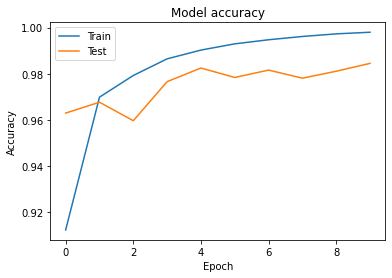

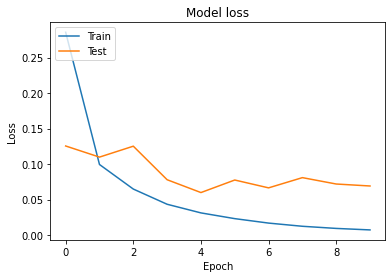

In [ ]:
#@title Plot the loss and accuracy for both training data and validation data using the history object in the source code.
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

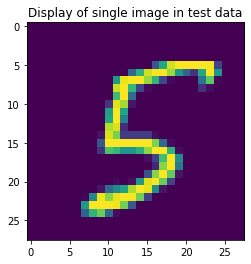

1/1 [==============================] - 0s 122ms/step

 The predicted single image in the test data is:  [[4.2893068e-19 1.0203530e-16 1.6078743e-18 1.5822390e-12 1.8104101e-19
  1.0000000e+00 8.9371437e-15 1.2766430e-19 3.0177362e-16 3.9090455e-14]]


In [ ]:
#@title Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image.

# plot the single image in the test data
plt.imshow(test_images[23].reshape(28,28))
plt.title('Display of single image in test data')
plt.show()

# get the prediction of the model on the above image in the test data
test_img_pred = model.predict(test_data[[23], :])          
print("\n The predicted single image in the test data is: ", test_img_pred)


In [ ]:
#@title change the number of hidden layer and the activation to tanh or sigmoid and see what happens.
model_1 = Sequential()
model_1.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model_1.add(Dense(550, activation='tanh'))
model_1.add(Dense(600, activation='tanh'))
model_1.add(Dense(612, activation='tanh'))
model_1.add(Dense(10, activation='sigmoid'))

model_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(train_data, train_labels_one_hot, batch_size=256, epochs=15, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss_1, test_acc_1] = model_1.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss_1, test_acc_1))

Epoch 1/15
235/235 [==============================] - 18s 70ms/step - loss: 0.4928 - accuracy: 0.8552 - val_loss: 0.2499 - val_accuracy: 0.9228
Epoch 2/15
235/235 [==============================] - 16s 67ms/step - loss: 0.1629 - accuracy: 0.9503 - val_loss: 0.1380 - val_accuracy: 0.9570
Epoch 3/15
235/235 [==============================] - 16s 69ms/step - loss: 0.1024 - accuracy: 0.9686 - val_loss: 0.1440 - val_accuracy: 0.9559
Epoch 4/15
235/235 [==============================] - 16s 68ms/step - loss: 0.0732 - accuracy: 0.9768 - val_loss: 0.1797 - val_accuracy: 0.9429
Epoch 5/15
235/235 [==============================] - 16s 69ms/step - loss: 0.0538 - accuracy: 0.9822 - val_loss: 0.0764 - val_accuracy: 0.9757
Epoch 6/15
235/235 [==============================] - 16s 69ms/step - loss: 0.0395 - accuracy: 0.9869 - val_loss: 0.0858 - val_accuracy: 0.9729
Epoch 7/15
235/235 [==============================] - 16s 69ms/step - loss: 0.0284 - accuracy: 0.9911 - val_loss: 0.0917 - val_accuracy:

In [ ]:
#@title Run the same code without scaling the images and check the performance


from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model_1 = Sequential()
model_1.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model_1.add(Dense(550, activation='tanh'))
model_1.add(Dense(600, activation='tanh'))
model_1.add(Dense(612, activation='tanh'))
model_1.add(Dense(10, activation='sigmoid'))

model_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(train_data, train_labels_one_hot, batch_size=256, epochs=15, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss_1, test_acc_1] = model_1.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss_1, test_acc_1))


(28, 28)
784
Epoch 1/15
235/235 [==============================] - 17s 68ms/step - loss: 0.5185 - accuracy: 0.8469 - val_loss: 0.2677 - val_accuracy: 0.9184
Epoch 2/15
235/235 [==============================] - 16s 70ms/step - loss: 0.2177 - accuracy: 0.9332 - val_loss: 0.2026 - val_accuracy: 0.9353
Epoch 3/15
235/235 [==============================] - 16s 69ms/step - loss: 0.1574 - accuracy: 0.9500 - val_loss: 0.2050 - val_accuracy: 0.9398
Epoch 4/15
235/235 [==============================] - 16s 67ms/step - loss: 0.1301 - accuracy: 0.9597 - val_loss: 0.2393 - val_accuracy: 0.9265
Epoch 5/15
235/235 [==============================] - 16s 67ms/step - loss: 0.1112 - accuracy: 0.9650 - val_loss: 0.1296 - val_accuracy: 0.9570
Epoch 6/15
235/235 [==============================] - 16s 69ms/step - loss: 0.0980 - accuracy: 0.9689 - val_loss: 0.1429 - val_accuracy: 0.9554
Epoch 7/15
235/235 [==============================] - 16s 69ms/step - loss: 0.0858 - accuracy: 0.9727 - val_loss: 0.1420 - 